In [1]:
import matplotlib.pyplot as plt
import random
from scipy.stats import bernoulli 

### problem 4.2

In [2]:
pryx = [0.2, 0.6, 0.3]
x = [0, 0.2, 0.8, 1]

def ErrorRate(stump):
    '''
    :type stump: dict
    {decision_value: val, true: TrueResult}
    :rtype int
    '''
    error_rate = 0
    for i in range(1,4):
        if stump['decision_value'] > x[i]:
            if stump['true'] == 1:
                error_rate += (x[i] - x[i-1]) * (1 - pryx[i-1])
            else:
                error_rate += (x[i] - x[i-1]) * pryx[i-1]
        elif x[i-1] < stump['decision_value'] <= x[i]:
            if stump['true'] == 1:
                error_rate += (stump['decision_value'] - x[i-1]) * (1 - pryx[i-1])
                error_rate += (x[i] - stump['decision_value']) * pryx[i-1]
            else:
                error_rate += (stump['decision_value'] - x[i-1]) * pryx[i-1]
                error_rate += (x[i] - stump['decision_value']) * (1 - pryx[i-1])
        else:
            if stump['true'] == 1:
                error_rate += (x[i] - x[i-1]) * pryx[i-1]
            else:
                error_rate += (x[i] - x[i-1]) * (1 - pryx[i-1])
    return error_rate

In [3]:
stumps = []
stump = {}
stump['decision_value'] = 0.4
stump['true'] = 0
stumps.append(stump)
stump = {}
stump['decision_value'] = 0.6
stump['true'] = 0
stumps.append(stump)
stump = {}
stump['decision_value'] = 0.6
stump['true'] = 1
stumps.append(stump)

for stump in stumps:
    print(round(ErrorRate(stump),2))

0.46
0.5
0.5


### problem 4.3

In [4]:
stumps = []
error1 = []
error2 = []
error3 = []
x_e = []
for i in range(0, 10001):
    stump1 = {}
    stump2 = {}
    stump1['decision_value'] = i * 0.0001
    stump1['true'] = 0
    stump2['decision_value'] = i * 0.0001
    stump2['true'] = 1
    x_e.append(i * 0.0001)
    error1.append(ErrorRate(stump1))
    error2.append(ErrorRate(stump2))
    error3.append(min(ErrorRate(stump1), ErrorRate(stump2)))

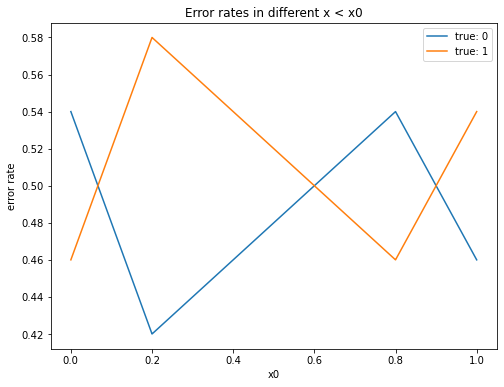

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))
line1, = ax.plot(x_e, error1);
line2, = ax.plot(x_e, error2);
line1.set_label('true: 0')
line2.set_label('true: 1')
ax.legend();
ax.set_xlabel('x0');
ax.set_ylabel('error rate')
ax.set_title('Error rates in different x < x0');

### problem 4.4

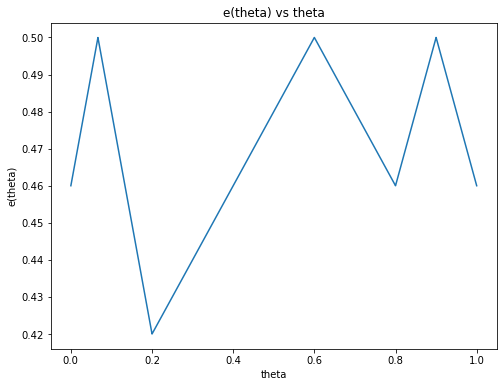

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))
line1, = ax.plot(x_e, error3);
ax.set_xlabel('theta');
ax.set_ylabel('e(theta)')
ax.set_title('e(theta) vs theta');

### problem 4.5

In [7]:
def generate_data(seed):
    training_data = [0 for row in range(100)]
    label = [0 for row in range(100)]
    random.seed(seed)
    
    for i in range(100):
        xi = random.random()
        training_data[i] = xi
        if xi <= 0.2:
            label[i] = bernoulli.rvs(p=0.2, size=1)[0]
        elif xi <= 0.8:
            label[i] = bernoulli.rvs(p=0.6, size=1)[0]
        else:
            label[i] = bernoulli.rvs(p=0.3, size=1)[0]
            
    return training_data, label

In [8]:
def predict(stump, data):
    y_predict = [0 for row in range(len(data))]
    for i in range(len(data)):
        if data[i] <= stump['decision_value']:
            if stump['true'] == 1:
                y_predict[i] = 1
            else:
                y_predict[i] = 0
        else:
            if stump['true'] == 1:
                y_predict[i] = 0
            else:
                y_predict[i] = 1
    return y_predict

In [9]:
def err(y_predict, y_real):
    error = 0
    for i in range(len(y_predict)):
        if y_predict[i] != y_real[i]:
            error += 1
    error_rate = error / len(y_predict)
    return error_rate

In [10]:
def train(training_data, label):
    best_stump = {}
    best_stump['error_rate'] = 1
    best_stump['decision_value'] = 0
    best_stump['exact_error_rate'] = 1
    best_stump['true'] = 0
    for i in range(len(training_data)):
        stump0 = {}
        stump0['decision_value'] = training_data[i]
        stump0['true'] = 0
        error_rate0 = err(predict(stump0, training_data), label)
        
        stump1 = {}
        stump1['decision_value'] = training_data[i]
        stump1['true'] = 1
        error_rate1 = err(predict(stump1, training_data), label)
        if error_rate0 >= error_rate1 and best_stump['error_rate'] > error_rate1:
            best_stump['error_rate'] = error_rate1
            best_stump['decision_value'] = stump1['decision_value']
            best_stump['true'] = 1
            best_stump['exact_error_rate'] = ErrorRate(best_stump)
        elif error_rate1 >= error_rate0 and best_stump['error_rate'] > error_rate0:
            best_stump['error_rate'] = error_rate0
            best_stump['decision_value'] = stump0['decision_value']
            best_stump['true'] = 0
            best_stump['exact_error_rate'] = ErrorRate(best_stump)
    return best_stump

In [11]:
thresholds = [0 for row in range(1000)]
err_rates = [0 for row in range(1000)]
exact_err_rates = [0 for row in range(1000)]
for i in range(1000):
    training_data, label = generate_data(i)
    best_stump = train(training_data, label)
    thresholds[i] = best_stump['decision_value']
    exact_err_rates[i] = best_stump['exact_error_rate']
    err_rates[i] = best_stump['error_rate']


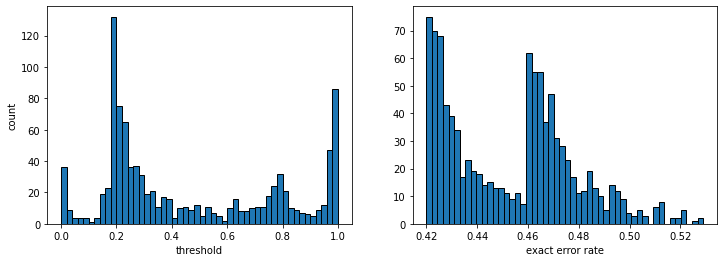

In [12]:
x_e = [i for i in range(1000)]
fig, ax = plt.subplots(1, 2, figsize=(12,4))
ax[0].hist(thresholds, align='mid', edgecolor='black', bins=50);
ax[0].set_xlabel('threshold');
ax[0].set_ylabel('count');
ax[1].hist(exact_err_rates, align='mid', edgecolor='black', bins=50);
ax[1].set_xlabel('exact error rate');